<a href="https://colab.research.google.com/github/WickedSero/NeuralNetworks/blob/main/2b_conv_net_with_real_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sieci konwolucyjne w Tensorflow dla realnych zbiorów danych

### Pobierzmy dane (zbiór realnych zdjęć kotów i psów z kaggle'a, pobierany przez stronę Microsoftu)

In [ ]:
import requests

url = 'https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip'
r = requests.get(url, allow_redirects=True)
open('dogs-vs-cats.zip', 'wb').write(r.content)

824887076

### Rozpakujmy skompresowany folder

In [ ]:
!unzip -qq dogs-vs-cats.zip

### Stwórzmy trzy podzbiory danych: treningowy, testowy i walidacyjny

In [ ]:
import os, shutil, pathlib
import imghdr
original_dir = pathlib.Path("PetImages")
new_base_dir = pathlib.Path("cats_vs_dogs")
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

def make_subset(subset_name, start_index, end_index):
    for category in ("Cat", "Dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{10000+i}.jpg" for i in range(start_index, end_index)]

        for fname in fnames:
          img_type = imghdr.what(original_dir/category/fname)
          if img_type in img_type_accepted_by_tf:
            shutil.copyfile(src=original_dir / category / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1300)
make_subset("test", start_index=1500, end_index=2500)

### Użyjmy klasy `image_dataset_from_directory` do wygenerowania struktur które posłużą jako zbiory ustandaryzowanych danych dla sieci

**Zadanie 3a. Patrząc na definicję zbioru treningowego, stwórz zbiór testowy i walidacyjny**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
img_shape = (img_size[0] , img_size[1] , 3)
train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()
valid_gen = ImageDataGenerator()

train_dataset = train_gen.flow_from_directory(
    directory = f"{new_base_dir}/train",
    target_size = img_size,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = True ,
    batch_size = 32)

validation_dataset = valid_gen.flow_from_directory(
    directory = f"{new_base_dir}/validation",
    target_size = img_size,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = False,       #dla zbiorów testowych i walidacyjnych shuffle = False
    batch_size = 32)

test_dataset = test_gen.flow_from_directory(
    directory = f"{new_base_dir}/test",
    target_size = img_size,
    class_mode = 'binary',
    color_mode = 'rgb',
    shuffle = False,
    batch_size = 32)


Found 1996 images belonging to 2 classes.
Found 598 images belonging to 2 classes.
Found 1997 images belonging to 2 classes.


### Spójrzmy na rozmiar i wymiary zbiorów danych przed paczkowaniem i po paczkowaniu

In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 224, 224, 3)
labels batch shape: (32,)


### Zbudujmy nieduży model konwolucyjny do klasyfikacji zdjęć w Tensorflow

**W bibiliotece Tensorflow możemy dodawać kolejne warstwy sieci w postaci funkcji layer(x) gdzie x to poprzednia warstwa a layer to obecna warstwa.**

**Zadanie 3b. Dokończ architekturę modelu, dodając na końcu kolejno:**
- warstwę konwolucyjną z 2 razy większą liczbą filtrów niż wcześniejsza, takim samym rozmiar kernela i taką samą fukcją aktywacji,
- warstwę poolingową identyczną jak wcześniejsze
- warstwę konwolucyjną identyczną jak poprzednia
- warstwę spłaszczającą (`Flatten`)
- wyjściową warstwę gęstą o jednym neuronie, która zwraca `wartość prawdpodobieństwa` - warstwę tę przypisz do zmiennej `outputs`

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(224, 224, 3))                               # warstwa wejściowa
x = layers.Rescaling(1./255)(inputs)                                    # warstwa normalizująca
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)      # warstwa konwolucyjna
x = layers.MaxPooling2D(pool_size=2)(x)                                 # warstwa poolingowa
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
...



outputs =
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(224, 224, 3))                               # warstwa wejściowa
x = layers.Rescaling(1./255)(inputs)                                    # warstwa normalizująca
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)      # warstwa konwolucyjna
x = layers.MaxPooling2D(pool_size=2)(x)                                 # warstwa poolingowa
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)      # warstwa konwolucyjna
x = layers.MaxPooling2D(pool_size=2)(x)                                 # warstwa poolingowa
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)     # warstwa konwolucyjna
x = layers.MaxPooling2D(pool_size=2)(x)                                 # warstwa poolingowa

# Dodajemy kolejne warstwy:
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)     # warstwa konwolucyjna z większą liczbą filtrów
x = layers.MaxPooling2D(pool_size=2)(x)                                 # warstwa poolingowa identyczna jak poprzednie
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)     # kolejna warstwa konwolucyjna

# Warstwa spłaszczająca:
x = layers.Flatten()(x)

# Warstwa wyjściowa - jeden neuron, prawdopodobieństwo klasy:
outputs = layers.Dense(1, activation="sigmoid")(x)

# Tworzenie modelu
model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          25,601 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,004,097 (3.83 MB)

 Trainable params: 1,004,097 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

**Zadanie 4a. Przygotuj model do treningu, z `binarną krosentropią` jako funkcją straty, `rmsprop` jako optymalizatorem i `trafnością` jako metryką.**

In [ ]:
model.compile(
    optimizer="RMSprop",                         # Optymalizator RMSprop
    loss="binary_crossentropy",                   # Funkcja straty: binarna krosentropia
    metrics=["accuracy"]                          # Metryka: trafność
)

In [ ]:
history = model.fit(
    train_dataset,                # Zbiór treningowy
    epochs=10,                    # Liczba epok
    validation_data=validation_dataset,  # Zbiór walidacyjny
    batch_size=32                 # Rozmiar partii (batch size)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.5034 - loss: 0.7509 - val_accuracy: 0.5017 - val_loss: 0.8408
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 303s 5s/step - accuracy: 0.5170 - loss: 0.7092 - val_accuracy: 0.6070 - val_loss: 0.6570
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 307s 5s/step - accuracy: 0.6289 - loss: 0.6410 - val_accuracy: 0.6488 - val_loss: 0.6364
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.6455 - loss: 0.6251 - val_accuracy: 0.6639 - val_loss: 0.6063
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 307s 5s/step - accuracy: 0.6970 - loss: 0.6058 - val_accuracy: 0.6906 - val_loss: 0.5914
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 321s 5s/step - accuracy: 0.7018 - loss: 0.5731 - val_accuracy: 0.7040 - val_loss: 0.5932
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 307s 5s/step - accuracy: 0.7194 - loss: 0.5454 - val_accuracy: 0.7207 - val_loss: 0.5521
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 320s 5s/step - accuracy: 0.7182 - loss: 0.5429 - val_accuracy: 0.7107 - val_loss: 0.

**Zadanie 4b. Naucz model na zbiorze treningowym w 15 epokach, z walidacją na zbiorze walidacyjnym i z użyciem callbacka zapisującego najlepszy model i przypisz historię uczenia do zmiennej `history`**

In [ ]:
# Definicja callbacka do zapisywania najlepszego modelu
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="convnet.keras",       # Ścieżka do zapisywania modelu
    save_best_only=True,            # Zapisuj tylko najlepszy model
    monitor="val_loss"              # Monitoruj funkcję straty na zbiorze walidacyjnym
)]

# Trening modelu
history = model.fit(
    train_dataset,                 # Zbiór treningowy
    epochs=15,                     # Liczba epok
    validation_data=validation_dataset,  # Zbiór walidacyjny
    batch_size=32,                 # Rozmiar partii
    callbacks=callbacks            # Dodanie callbacka do treningu
)


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 299s 5s/step - accuracy: 0.8039 - loss: 0.4130 - val_accuracy: 0.7174 - val_loss: 0.5715
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 298s 5s/step - accuracy: 0.8184 - loss: 0.3737 - val_accuracy: 0.7074 - val_loss: 0.6497
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 326s 5s/step - accuracy: 0.8608 - loss: 0.3311 - val_accuracy: 0.7241 - val_loss: 0.5839
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 337s 5s/step - accuracy: 0.9017 - loss: 0.2437 - val_accuracy: 0.7224 - val_loss: 0.6965
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 304s 5s/step - accuracy: 0.9362 - loss: 0.1865 - val_accuracy: 0.6973 - val_loss: 0.7465
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 320s 5s/step - accuracy: 0.9339 - loss: 0.1620 - val_accuracy: 0.6973 - val_loss: 0.9267
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 304s 5s/step - accuracy: 0.9527 - loss: 0.1192 - val_accuracy: 0.7258 - val_loss: 1.1089
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 302s 5s/step - accuracy: 0.9636 - loss: 0.0931 - val_accuracy: 0.7174 - v

### Zobaczmy performance sieci

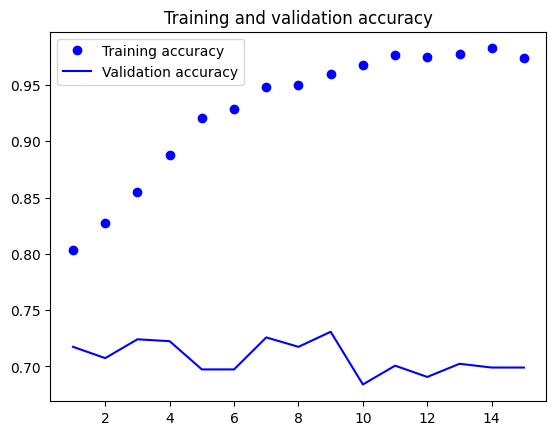

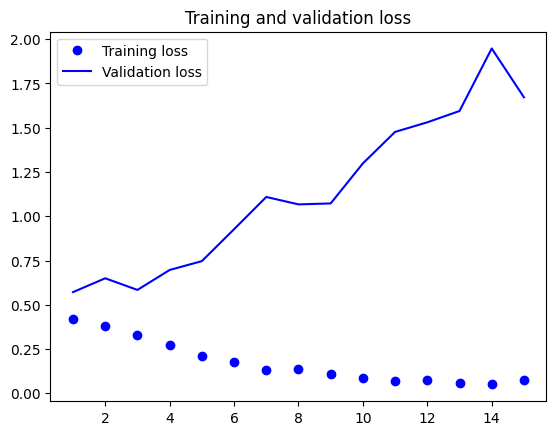

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Dokonajmy ewaluacji modelu

In [ ]:
test_model = keras.models.load_model("convnet.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7504 - loss: 0.5715
Test accuracy: 0.726


**Zdefiniujmy pierwszy fragment sieci, który będzie odpowiadał za modyfikację próbek**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

### Zobaczmy zmodyfikowane w ten sposób, losowe próbki

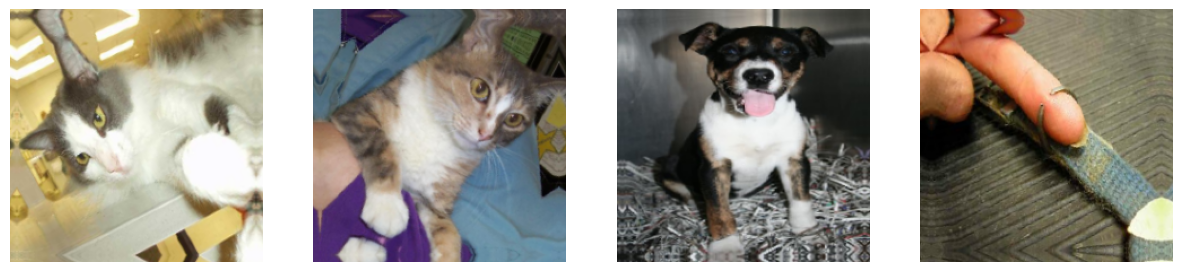

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))
for i in range(4):
  # convert to unsigned integers for plotting
  image = next(train_dataset)
  image = data_augmentation(image)
  # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
  image = np.squeeze(image)
  # plot raw pixel data
  ax[i].imshow(image[0].astype("uint8"))
  ax[i].axis('off')

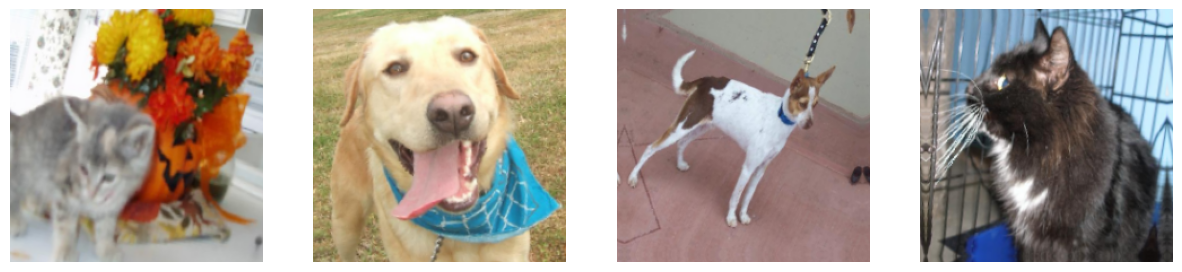

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))

for i in range(4):
    # Pobieramy jedną paczkę obrazów (batch), gdzie obraz ma wymiary (224, 224, 3)
    image, label = next(train_dataset)  # Fetch the next batch
    image = image[0]  # Wybieramy pierwszy obraz z paczki (batch size = 32)

    # Teraz aplikujemy augmentację danych na pojedynczym obrazie
    augmented_image = data_augmentation(image[None, ...])  # Przekształcamy w (1, 224, 224, 3)

    # Konwersja z powrotem na format odpowiedni do wyświetlania
    augmented_image = np.squeeze(augmented_image, axis=0)  # Zmiana z (1, 224, 224, 3) na (224, 224, 3)

    # Wyświetlamy przetworzony obraz
    ax[i].imshow(augmented_image.astype("uint8"))
    ax[i].axis('off')

plt.show()


### Stwórzmy nowy model, który uwzględni regularyzację poprzez rozszerzenie zbioru danych

**Zadanie 5a. Stwórz nowy model sieci konwolucyjnej, analogiczny do poprzedniego, ale ze zdefiniowanym powyżej fragmentem `'augmentacyjnym'` zaraz za wejściem oraz z warstwą `dropout`, o parametrze np. 0.5 (sprawdź w dokumentacji), między warstwą spłaszczającą a warstwą wyjściową**

In [ ]:
!pip install matplotlib numpy torch torchvision

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Warstwa augmentacyjna
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),   # Losowe odbicie w poziomie
        layers.RandomRotation(0.1),        # Losowa rotacja (do 10% obrotu)
        layers.RandomZoom(0.2),            # Losowe powiększenie o 20%
    ]
)

# Definicja modelu
inputs = keras.Input(shape=(224, 224, 3))                               # Warstwa wejściowa
x = data_augmentation(inputs)                                            # Warstwa augmentacji danych
x = layers.Rescaling(1./255)(x)                                          # Warstwa normalizująca
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)       # Warstwa konwolucyjna
x = layers.MaxPooling2D(pool_size=2)(x)                                  # Warstwa poolingowa
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

# Warstwa spłaszczająca
x = layers.Flatten()(x)

# Dodanie warstwy Dropout
x = layers.Dropout(0.5)(x)                                               # Warstwa Dropout (50%)

# Warstwa wyjściowa
outputs = layers.Dense(1, activation="sigmoid")(x)                         # Warstwa wyjściowa z aktywacją sigmoid dla klasyfikacji binarnej

# Definicja modelu
model = keras.Model(inputs=inputs, outputs=outputs)



**Zadanie 5b. Skompiluj model, naucz (historię przypisz do zmiennej `history`) i dokonaj jego ewaluacji**

In [ ]:
# Kompilacja modelu
model.compile(
    optimizer="RMSprop",                         # Optymalizator RMSprop
    loss="binary_crossentropy",                   # Binarna krosentropia jako funkcja straty
    metrics=["accuracy"]                          # Metryka: trafność
)

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath="convnet_augmentation.keras", save_best_only=True, monitor="val_loss")]
history = model.fit(
    train_dataset,                 # Zbiór treningowy
    epochs=15,                     # Liczba epok
    validation_data=validation_dataset,  # Zbiór walidacyjny
    batch_size=32,                 # Rozmiar partii
    callbacks=callbacks            # Dodanie callbacka do treningu
)

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.4995 - loss: 1.0555 - val_accuracy: 0.6137 - val_loss: 0.6857
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.5772 - loss: 0.6888 - val_accuracy: 0.6037 - val_loss: 0.6543
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.5775 - loss: 0.6963 - val_accuracy: 0.6505 - val_loss: 0.6277
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.6533 - loss: 0.6404 - val_accuracy: 0.7074 - val_loss: 0.5926
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.6611 - loss: 0.6387 - val_accuracy: 0.6355 - val_loss: 0.6357
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 258s 4s/step - accuracy: 0.6635 - loss: 0.6171 - val_accuracy: 0.7057 - val_loss: 0.5744
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.6804 - loss: 0.5961 - val_accuracy: 0.7408 - val_loss: 0.5565
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.6999 - loss: 0.5894 - val_accuracy: 0.6672 - v

In [ ]:
test_model = keras.models.load_model(
    "convnet_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.7610 - loss: 0.5303
Test accuracy: 0.745


### Ponownie prześledźmy proces uczenia

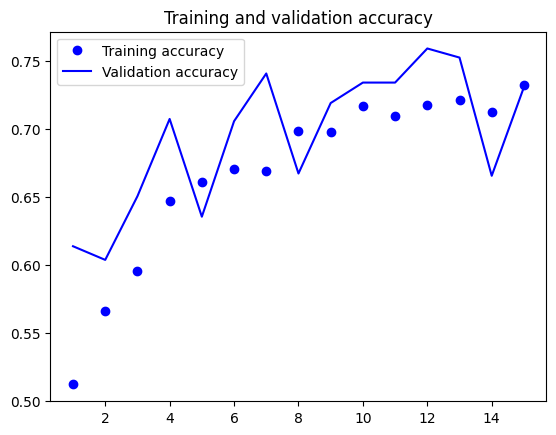

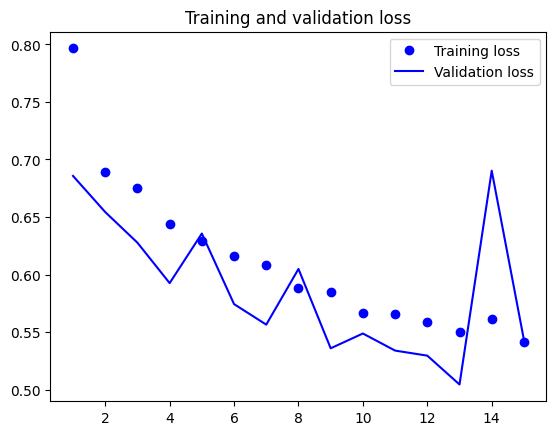

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Zadanie 5c. Jakie dostrzegasz różnice w procesie uczenia z bazowym i poszerzonym zbiorem danych?**

1. Model bazowy jest szybszy od poszerzonego. Augomentacja zwiększa czas uczenia ze względu na przetwarzanie obrazów.
2. Dzięki zastosowaniu augemntacji i dropoutu model może lepiej adaptować się do nowych danych i zminimalizować przeuczenie ponieważ dane są bardziej zróżnicowane. W pierwszym modelu dane treningowe stabilizują się na niższym poziomie walidacyjnym, co sugeruje przeuczenie.
3. Augumentacja stabilizuje proces uczenia się, dzięki zwiększeniu różnorodności danych.
4. Dropout sprawia, że model w trakcie uczenia odrzuca szumy.


